In [2]:
import pandas as pd
#import seaborn as sns
#import scipy
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
# import pybel
# from __future__ import division

from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.Lipinski import NumHDonors, NumHAcceptors, NumAromaticRings
import rdkit.Chem as Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem.Crippen import MolLogP

import sys
sys.path.append('../')

import csv
import torch

%matplotlib inline

In [11]:
data = pd.read_csv("./Asyn_aggregation_data.csv").values
    
print(data)
print(type(data))

data = np.transpose(data)

[['Cc(ccc1c2[nH]c3c(C(C(O)=O)NCC3)n2)c4c1cccn4' nan nan 4.3 nan]
 ['Clc(cc1)cc2c1occ(/C=C3C(NN(c4ccccc4)C/3=O)=O)c2=O' nan nan 4.3 nan]
 ['COc(cc1)cc2c1c(ccc(OCc3[nH]nnn3)c4C)c4oc2=O' nan nan 4.3 nan]
 ...
 ['Cl.Cl.Cc1noc(C)c1-c1nc2C(NCCc2[nH]1)C(O)=O' 16.66666667 0.5
  0.784313725 0.031893289]
 ['Clc1c(Cl)cc(NC(Nn(c(=O)[nH]c2c3cccc2)c3=O)=O)cc1' 12.75 0.417
  0.659482759 0.021816796]
 ['Cc1c(OCC#N)ccc2c1oc(=O)c1ccccc12' 12.222 0.111 0.647043253 0.014556719]]
<class 'numpy.ndarray'>


In [12]:
# smiles = data[15]
# VINA = data[26]
# CNSMPO = data[-1]

# print(smiles)
# print(VINA)
# print(CNSMPO)

smiles = data[0]
thalf = data[3]

smiles = [s.split()[0] for s in smiles]

print(smiles)
print(thalf)

['Cc(ccc1c2[nH]c3c(C(C(O)=O)NCC3)n2)c4c1cccn4', 'Clc(cc1)cc2c1occ(/C=C3C(NN(c4ccccc4)C/3=O)=O)c2=O', 'COc(cc1)cc2c1c(ccc(OCc3[nH]nnn3)c4C)c4oc2=O', 'Oc1c(\\C=C2/C(=O)NN(C2=O)c2ccc(Cl)cc2)cc(Br)cc1[N+]([O-])=O', 'OC(=O)c1ccc(cc1)N1NC(=O)\\C(=C/c2ccc(o2)[N+]([O-])=O)C1=O', 'CCOC(=O)c1ccc(cc1)N1N=C(O)\\C(=C/c2ccc(o2)[N+]([O-])=O)C1=O', 'Cc1c(OCc2nnn[nH]2)ccc2c3ccccc3c(=O)oc12', 'Brc1ccc(\\C=C2/C(=O)NN(C2=O)c2ccccc2)o1', 'Cc1cccc2c(c[nH]c12)-c1nc2C(NCCc2[nH]1)C(O)=O', 'Brc1ccc2occ(\\C=C\\C=C3C(=O)NC(=S)NC3=O)c(=O)c2c1', 'CCOC(=O)c1ccc(cc1)N1NC(=O)\\C(=C\\c2ccc(C=O)cc2)C1=O', 'O=C1NC(=S)NC(=O)C1=C\\C=C\\c1coc2ccccc2c1=O', 'COC(Nc1ccc(c2[nH]c3c(C(C(O)=O)NCC3)n2)cc1)=O', 'CCCOc1ccccc1\\C=C1\\C(=O)NN(C1=O)c1ccc(I)cc1', 'Cc1ccc(-c2nc3C(NCCc3[nH]2)C(O)=O)c2cccnc12', 'Cl.Cl.COc1ccc(Cl)cc1-c1nc2C(NCCc2[nH]1)C(O)=O', 'OC(C1NCCc2c1nc(c3cc(F)cc(F)c3)[nH]2)=O', 'CCc1ccc(cc1)N1NC(=O)\\C(=C/c2ccc(O)cc2)C1=O', 'COc1ccc(c2[nH]c3c(C(C(O)=O)NCC3)n2)cc1', 'COc1ccc2c3ccc(OCc4nnn[nH]4)cc3oc(=O)c2c1', 'Fc1ccc2o

In [16]:
#data_tuple = zip(smiles, VINA, CNSMPO)
data_tuple = zip(smiles, thalf)

In [14]:
cleaned_data = []
for i in data_tuple:
    if i[1] <= 0:
        cleaned_data.append(i)

print(cleaned_data)

[]


In [15]:
smiles, VINA, CNSMPO = list(zip(*cleaned_data))

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, alpha=0.1)
    ax.set_xlim([-13.5, 0])
    ax.set_ylim([0, 7])

    # now determine nice limits by hand:
    xbinwidth = 0.1
    ybinwidth = 0.05
    # xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    # lim = (int(xymax/binwidth) + 1) * binwidth
    
    xmax = 0
    xmin = -13.5
    xlim = (int((xmax-xmin)/xbinwidth) + 1) * xbinwidth
    xbins = np.arange(xmin, xlim + xbinwidth, xbinwidth)
    
    
    ymax = 7
    ymin = 0
    ylim = (int((7)/ybinwidth) + 1) * ybinwidth
    ybins = np.arange(ymin, ylim + ybinwidth, ybinwidth)

    # bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=xbins, alpha=0.5)
    ax_histy.hist(y, bins=ybins, orientation='horizontal', alpha=0.5)


    
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(VINA, CNSMPO, ax, ax_histx, ax_histy)

plt.show()

ValueError: not enough values to unpack (expected 3, got 0)

104


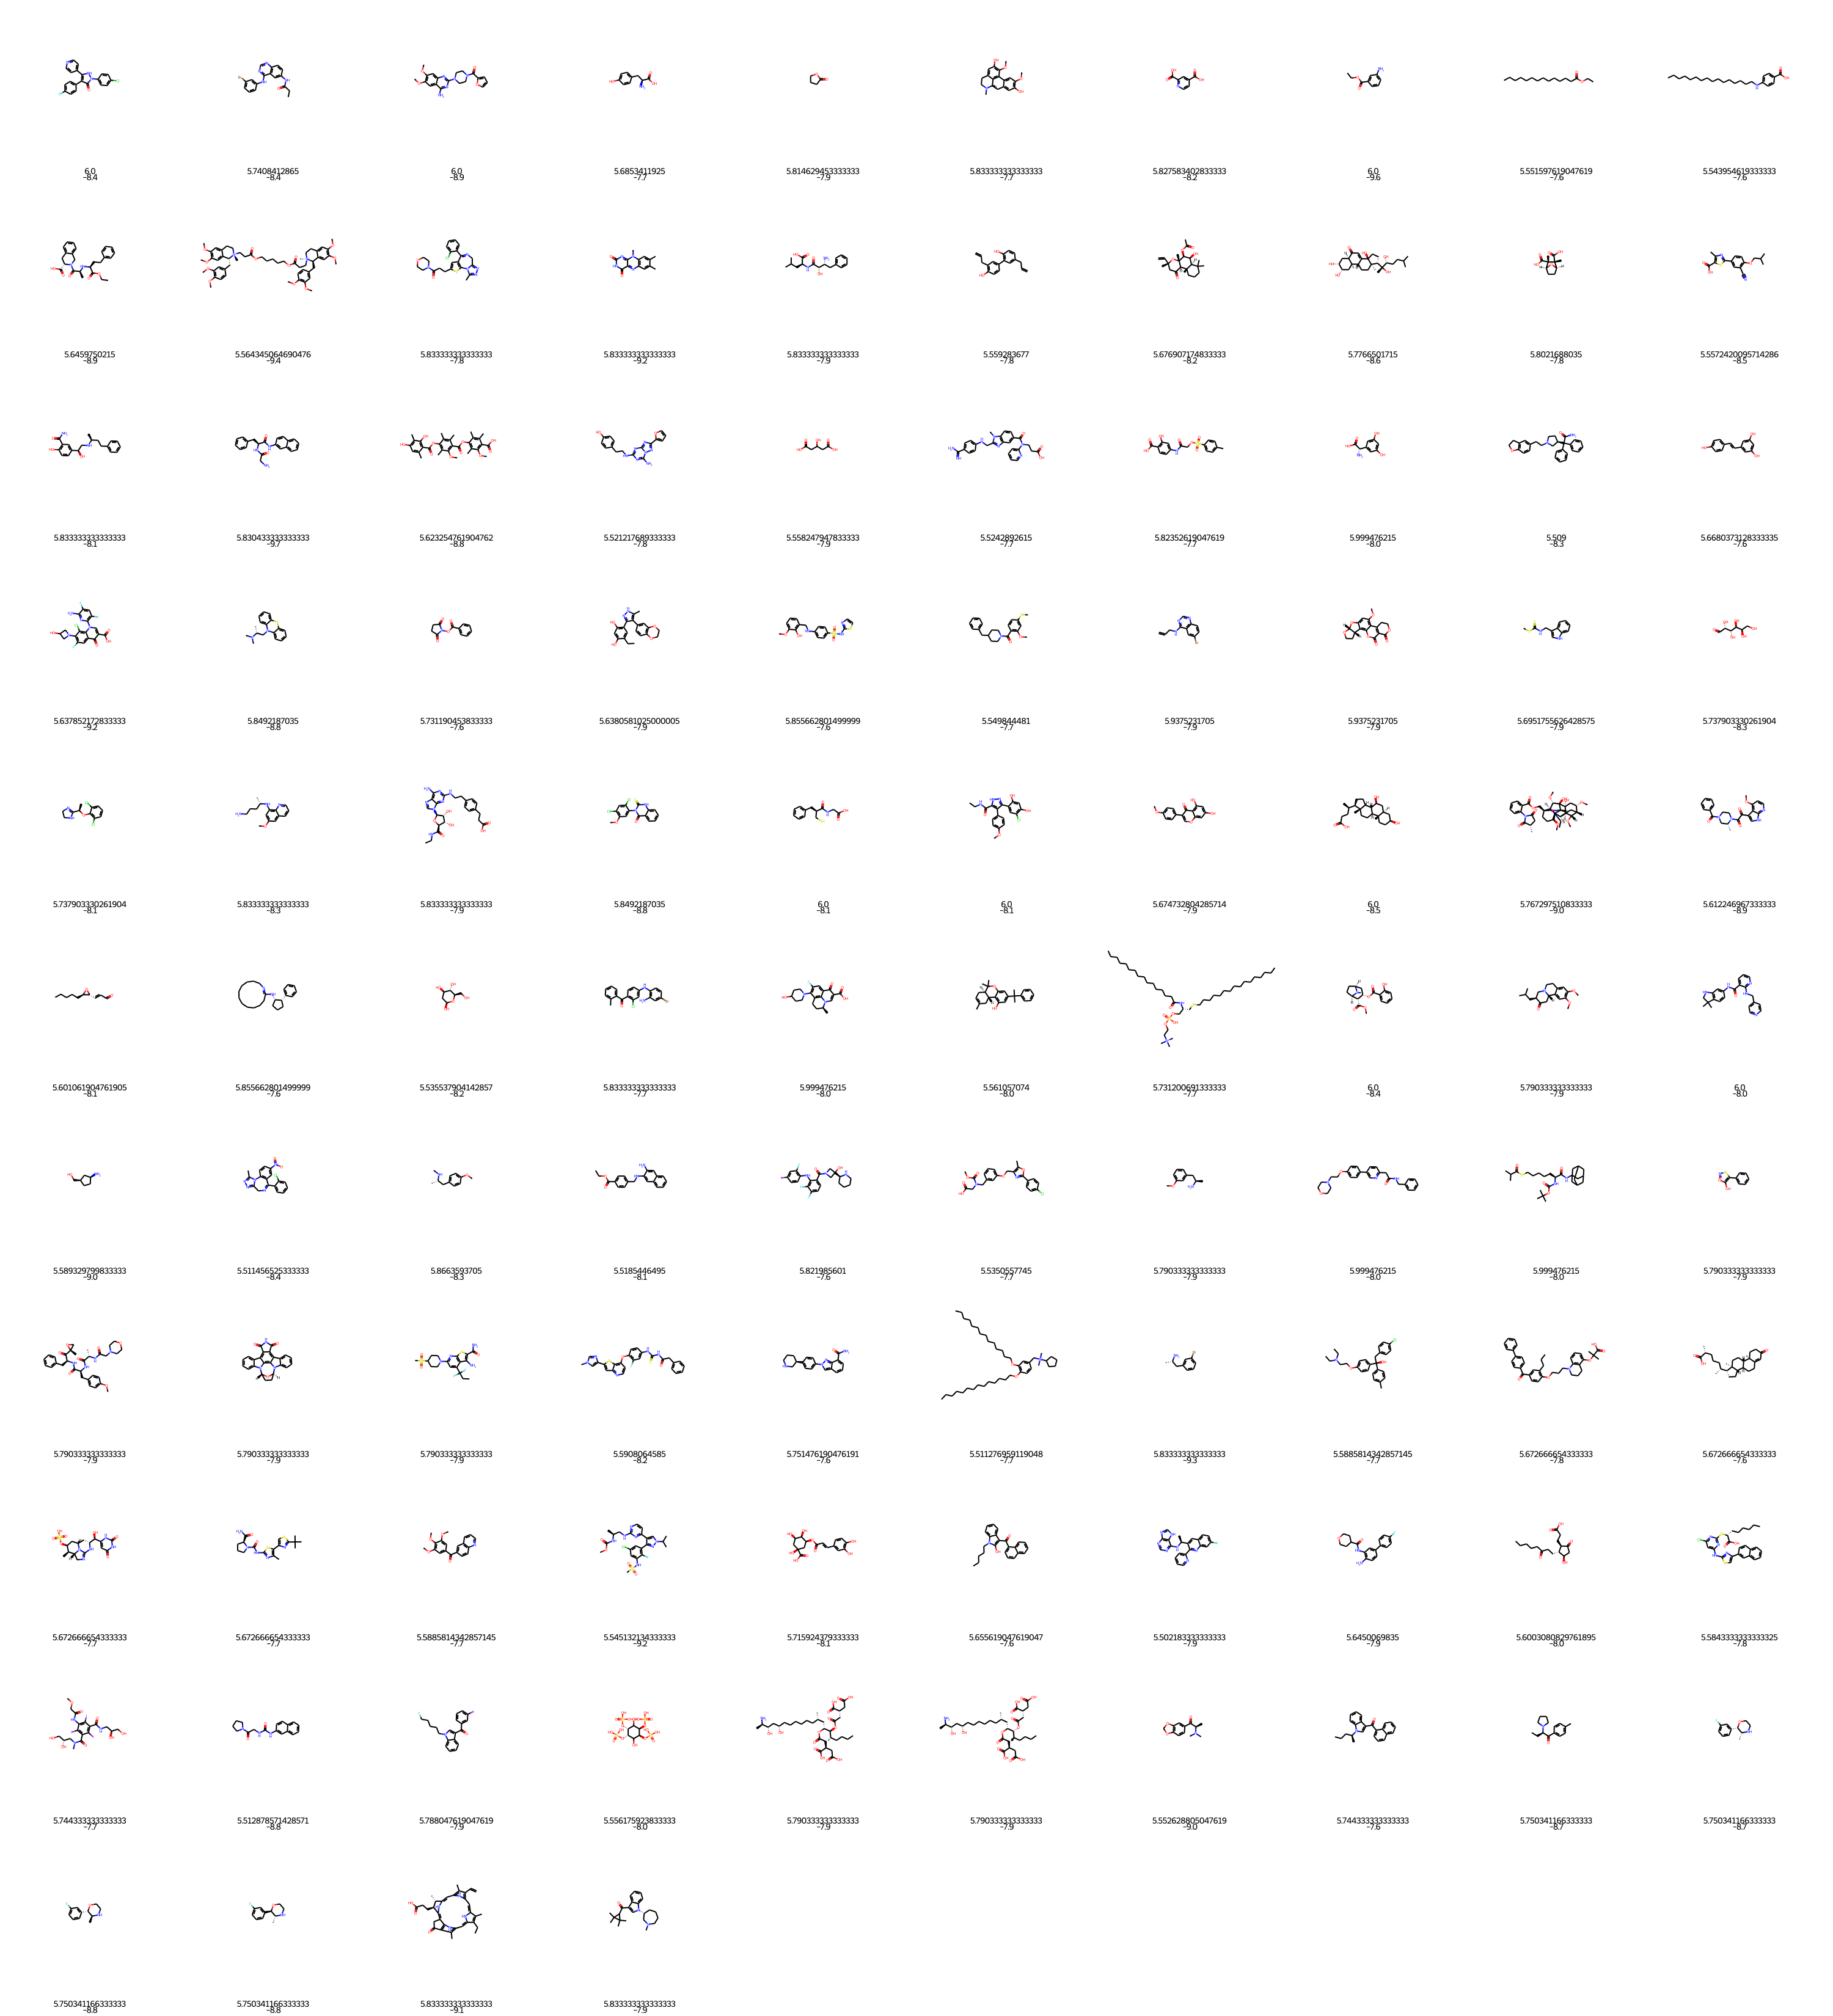

In [9]:
####Visualizing molecules####

#Select a subset of molecules
MaxVINA = -7.5
MinCNSMPO = 5.5
MaxSAScore = 3
LastN = 8000 

#Apply filters

drawoutputsmiles = []
for i, mol in enumerate(smiles[-LastN:]):
    if(CNSMPO[i] > MinCNSMPO and VINA[i] < MaxVINA):
        drawoutputsmiles.append([mol, i])

MolsForVisualizing = [Chem.rdmolfiles.MolFromSmiles(mol[0]) for mol in drawoutputsmiles]

print(len(MolsForVisualizing))

legend = []
for mol in drawoutputsmiles:
    legend.append(str(CNSMPO[mol[1]]) + "\n" + str(VINA[mol[1]]))

Chem.Draw.MolsToGridImage(MolsForVisualizing, molsPerRow=int(len(drawoutputsmiles[-LastN:])**0.5), subImgSize=(300, 300), legends=legend, maxMols=1000)


In [12]:
with open('cleaned_data_thalf.csv', 'w') as csvfile:
    datawriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    datawriter.writerow(["SMILES", "norm_t_half"])
    for i in data_tuple:
        datawriter.writerow(i)


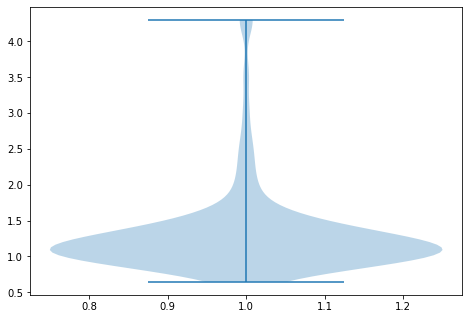

In [7]:
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(list(thalf))
plt.show()

In [9]:
outputsmiles = []
outputcnsmpo = []
outputvina = []
with open("../mol_dqn/chemgraph/SMILES.csv", "r") as outputdata:
    csv_reader = csv.reader(outputdata, delimiter=',')
    for row in csv_reader:
        outputsmiles.append(row[2])
        outputvina.append(float(row[0].strip("[]")))
        outputcnsmpo.append(float(row[1].strip("[]")))

print(outputsmiles)

['N=CCN1c2ccccc2Cc2c(O)ncnc21', 'N=CCn1c2ccccc2c(=O)c2c(O)ncnc21', 'N=C=Cn1c2ccccc2c(=O)c2c(O)ncnc21', 'N=C=Cn1c2ncnc(O)c2c(=O)c2cccc(Cl)c21', 'N=C=Cn1c2ncnc(O)c2c(=O)c2ccc(O)c(Cl)c21', 'N=C=Cn1c2ncnc(ON)c2c(=O)c2ccc(O)c(Cl)c21', 'NOc1ncnc2c1c(=O)c1ccc(O)c(Cl)c1n2C=C=NO', 'Cc1nc(ON)c2c(=O)c3ccc(O)c(Cl)c3n(C=C=NO)c2n1', 'Cc1nc(ON)c2c(=O)c3c(F)cc(O)c(Cl)c3n(C=C=NO)c2n1', 'Cc1nc(ON)c2c(n1)N(C=C=NO)c1c(Cl)c(O)cc(F)c1C2', 'Cc1nc(ON)c2c(n1)N(C(Cl)=C=NO)c1c(Cl)c(O)cc(F)c1C2', 'Cc1nc(ON)c2c(n1)N1C(Cl)=C=NOC2c2c(F)cc(O)c(Cl)c21', 'CCc1nc(ON)c2c(n1)N1C(Cl)=C=NOC2c2c(F)cc(O)c(Cl)c21', 'CCc1nc(ON)c2c(n1)N1C(Cl)=C=NOC2c2c(F)cc(OS)c(Cl)c21', 'CCc1nc(ON)c2c(n1)N1C(Cl)=C=NOC2c2c(F)c(F)c(OS)c(Cl)c21', 'C=CCc1nc(ON)c2c(n1)N1C(Cl)=C=NOC2c2c(F)c(F)c(OS)c(Cl)c21', 'C=CCc1nc(ON)c2c(n1)N1C(Cl)=C=NOC2c2c(F)c(F)c(OSO)c(Cl)c21', 'C=CC(C)c1nc(ON)c2c(n1)N1C(Cl)=C=NOC2c2c(F)c(F)c(OSO)c(Cl)c21', 'C=CC1CC23ON=C=C(Cl)N(c4nc1nc(ON)c42)c1c(Cl)c(OSO)c(F)c(F)c13', 'C=CC1CC2ON=C=C(Cl)N(c3cc(F)c(F)c(OSO)c3Cl)c3nc1nc(ON)c32

NameError: name 'CNSMPO' is not defined

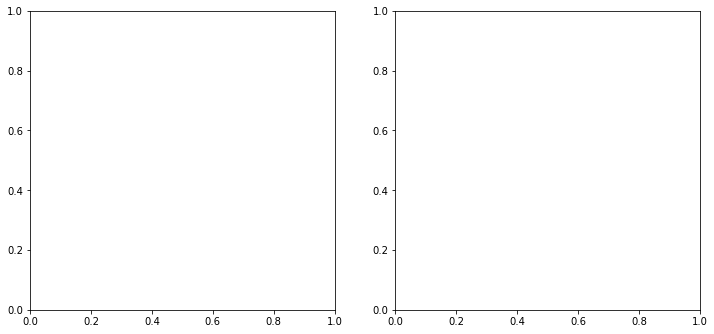

In [10]:

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5.5))


# plot violin plot
original = axs[0].violinplot(CNSMPO,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('CNSMPO')

# plot box plot
# optimized = axs[0].violinplot(outputcnsmpo[-8231:],
#                   showmeans=False,
#                   showmedians=True)

axs[1].violinplot(VINA[-8231:],
                  showmeans=False,
                  showmedians=True)
# axs[1].violinplot(outputvina,
#                   showmeans=False,
#                   showmedians=True)
axs[1].set_title('VINA')


plt.show()

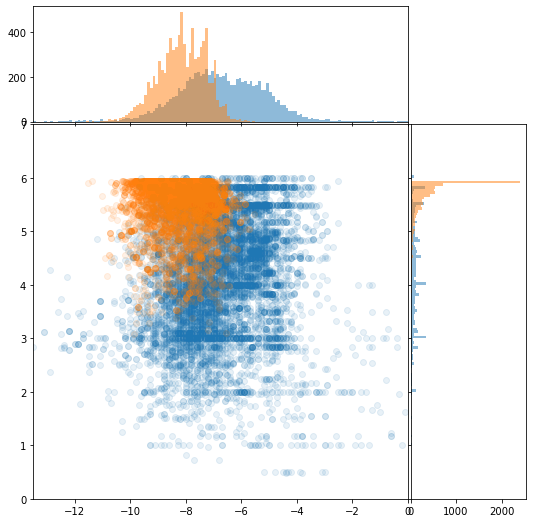

In [11]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(VINA, CNSMPO, ax, ax_histx, ax_histy)
scatter_hist(outputvina[-8231:], outputcnsmpo[-8231:], ax, ax_histx, ax_histy)

plt.show()

In [11]:
drawoutputsmiles = []
for i, mol in enumerate(outputsmiles[-8231:]):
    if(outputcnsmpo[i] > 4.5 and outputvina[i] < -9.11):
        drawoutputsmiles.append([mol, i])

print(len(drawoutputsmiles))

127


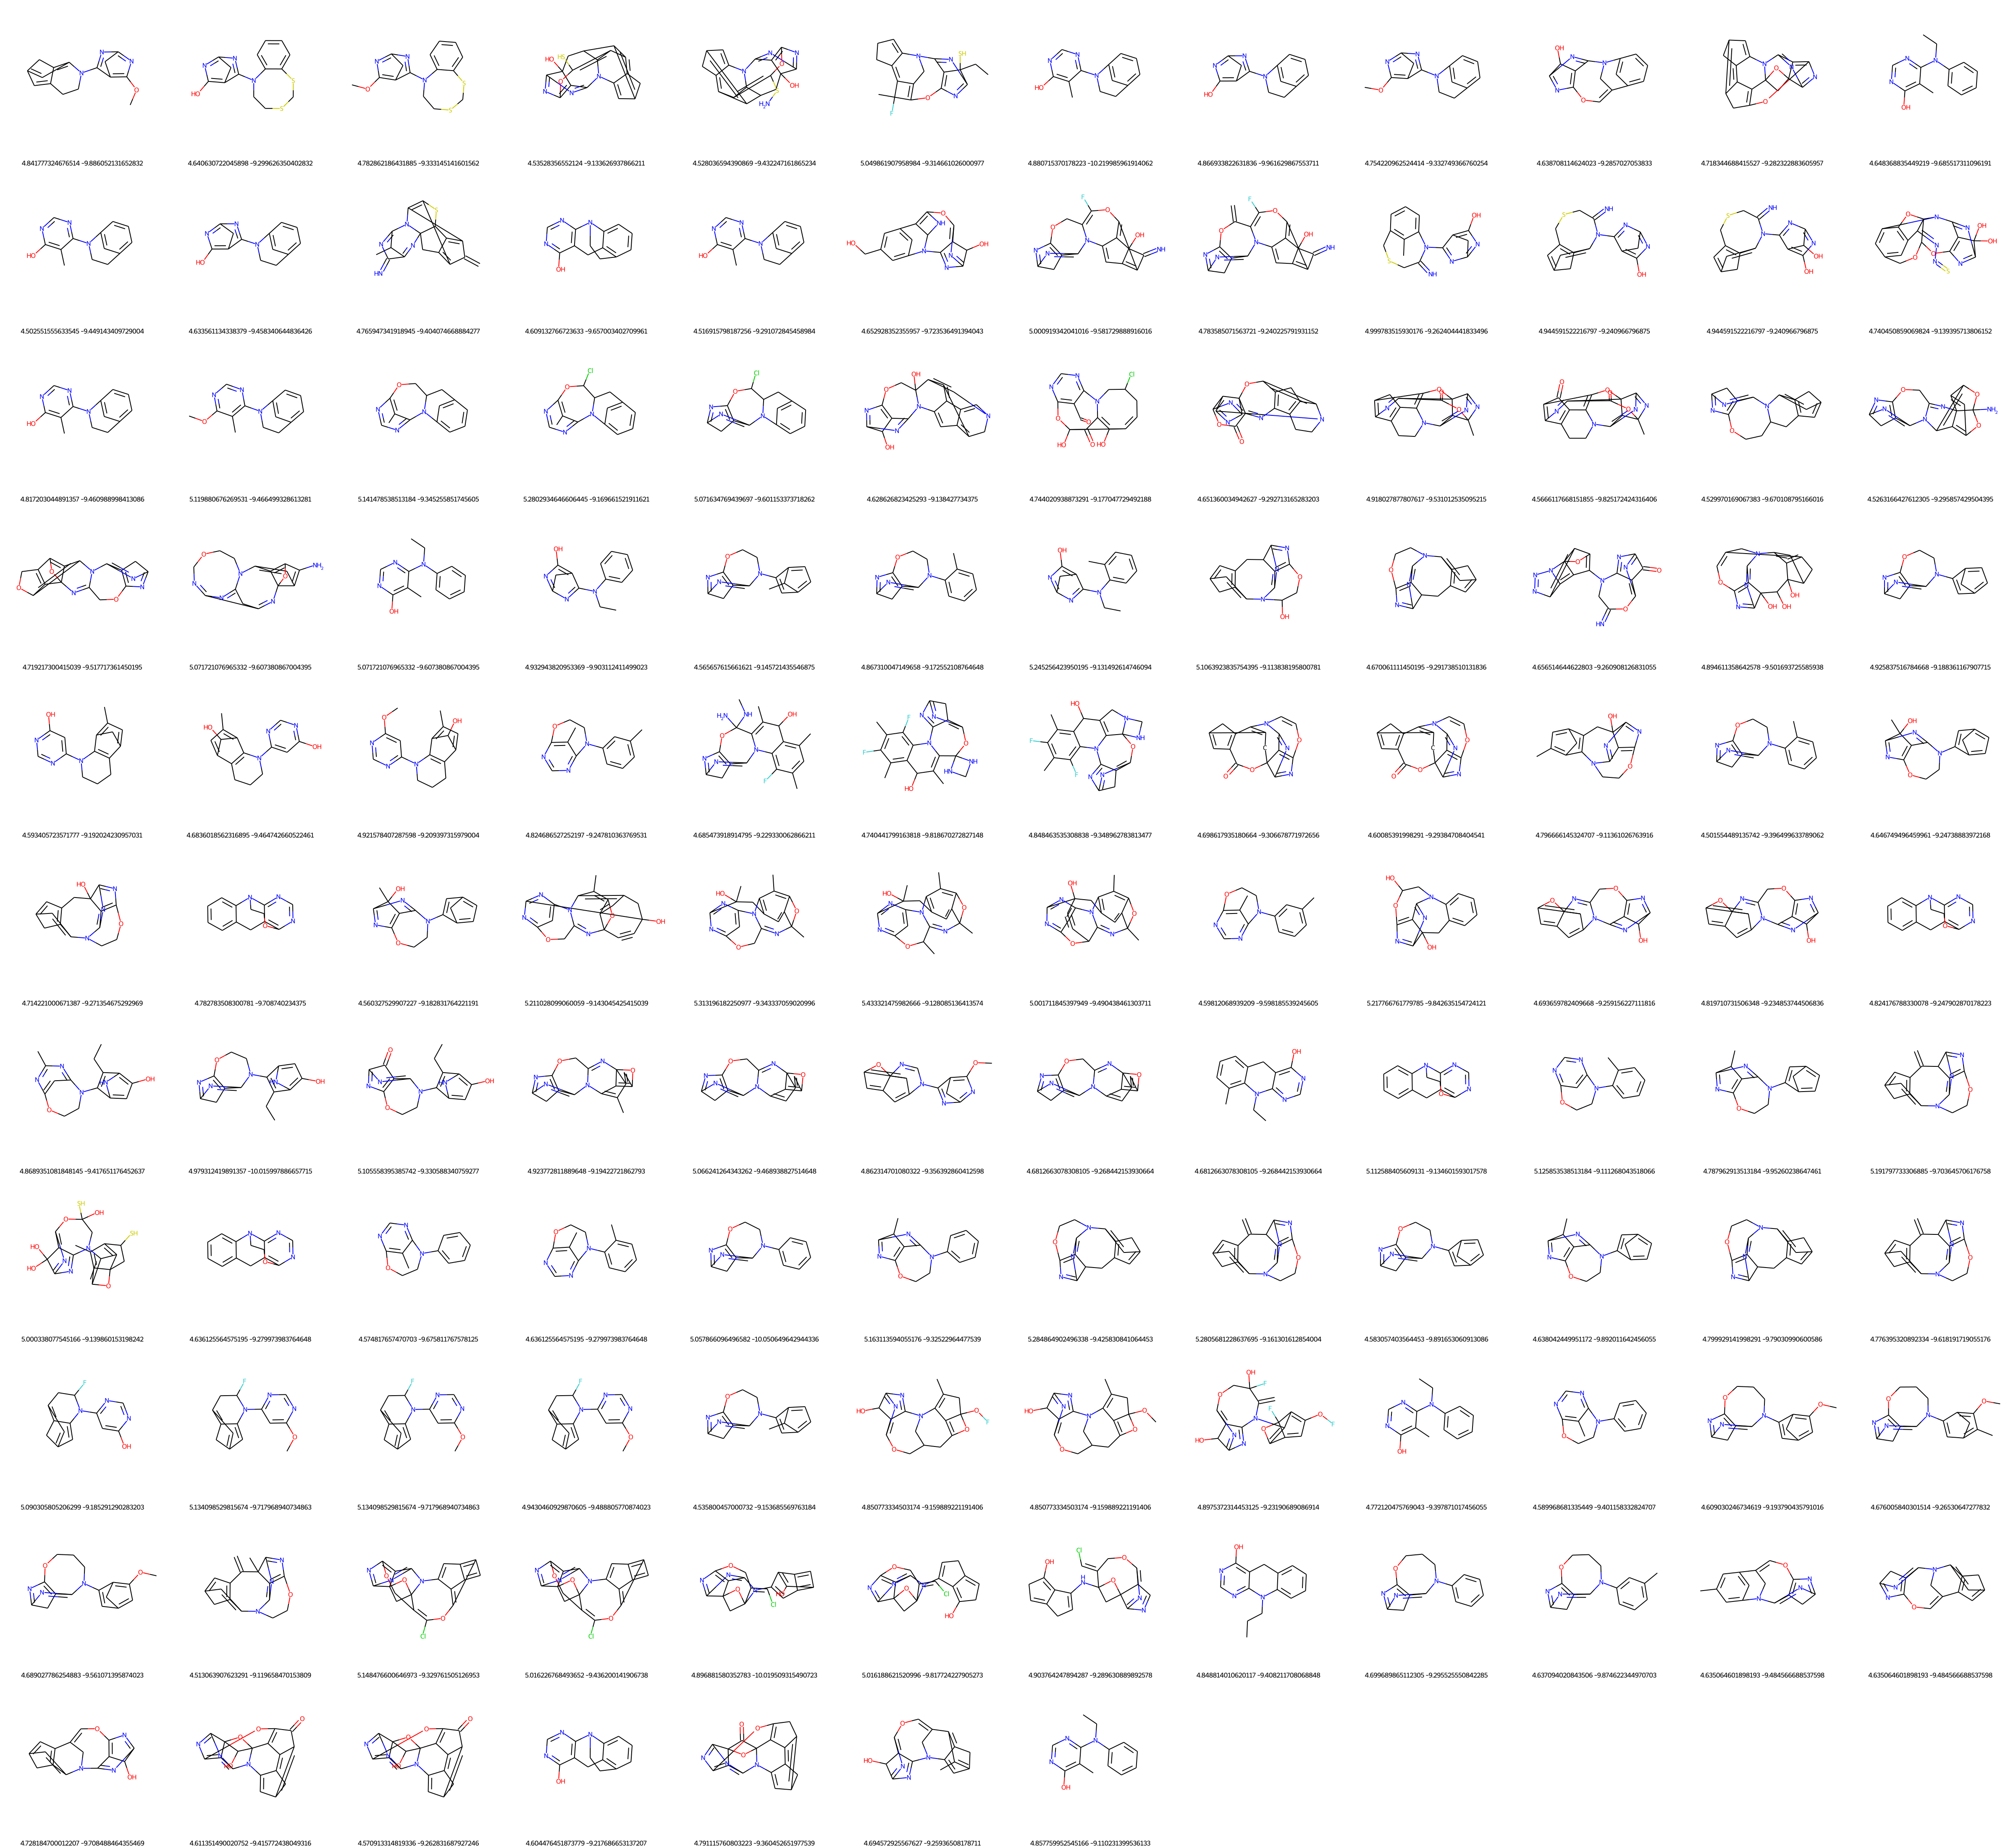

In [12]:
mols = [Chem.rdmolfiles.MolFromSmiles(mol[0]) for mol in drawoutputsmiles]
legend = []
for mol in drawoutputsmiles:
    legend.append(str(outputcnsmpo[mol[1]]) + " " + str(outputvina[mol[1]]))
#print(mols)
#print(legend)
Chem.Draw.MolsToGridImage(mols, molsPerRow=12, subImgSize=(400, 400), legends=legend, maxMols=600)

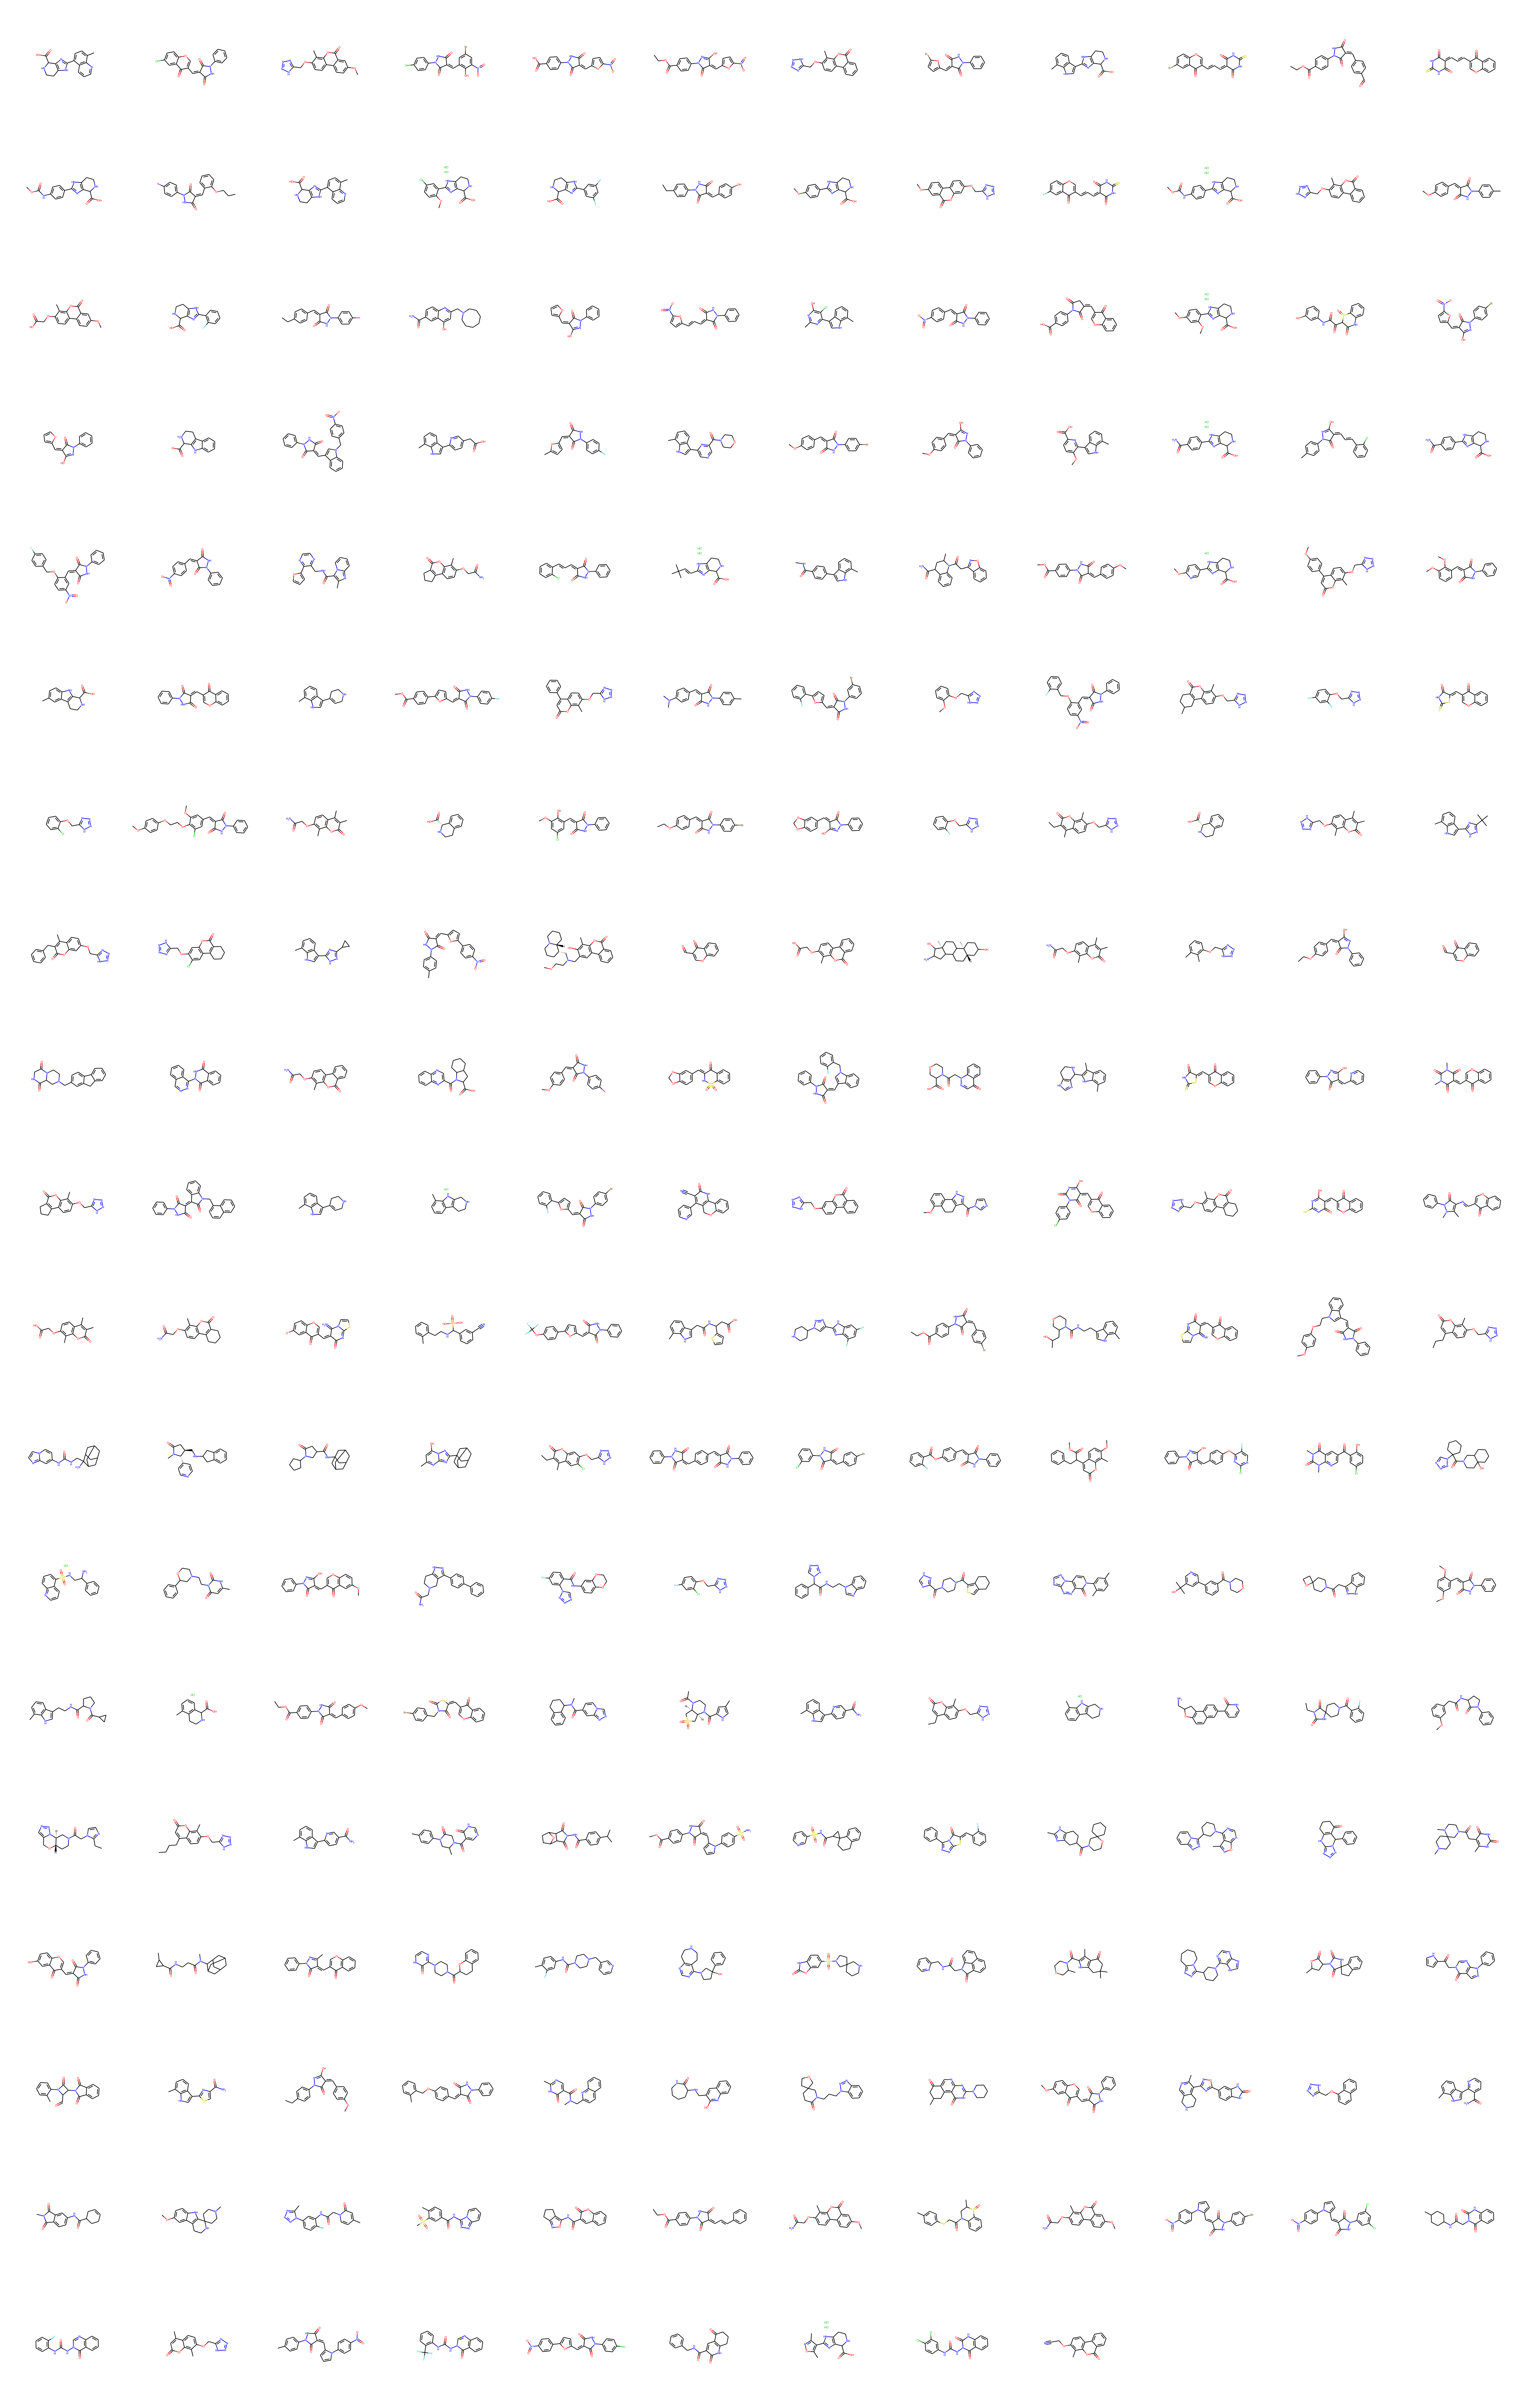

In [23]:
thalfmols = [Chem.MolFromSmiles(s) for s in smiles]


Chem.Draw.MolsToGridImage(thalfmols, molsPerRow=12, subImgSize=(400, 400),  maxMols=600)